# LINEAR REGRESSION MODEL

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
# Loading the data sets

#Table = pd.read_csv('GrassRoot_AI_data/measures.csv', sep=',')
#Table.head()

,Gender,Height,Weight,Height (cm),Weight (kg)
0,Male,73.847017,241.893563,187.571423,109.720985
1,Male,68.781904,162.310473,174.706036,73.622732
2,Male,74.110105,212.740856,188.239668,96.497550
3,Male,71.730978,220.042470,182.196685,99.809504
4,Male,69.881796,206.349801,177.499762,93.598619


In [13]:
filename = 'measures.csv'
df = pd.read_csv(filename)
df.head()

,Gender,Height,Weight,Height (cm),Weight (kg)
0,Male,73.847017,241.893563,187.571423,109.720985
1,Male,68.781904,162.310473,174.706036,73.622732
2,Male,74.110105,212.740856,188.239668,96.497550
3,Male,71.730978,220.042470,182.196685,99.809504
4,Male,69.881796,206.349801,177.499762,93.598619


In [18]:
# Assigning specific column heads to various varible
height = df['Height (cm)']
weight = df['Weight (kg)']
gender = df['Gender']

In [19]:
# statistical summary on the data
df.describe()

,Height,Weight,Height (cm),Weight (kg)
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,168.573602,73.228054
std,3.847528,32.108439,9.772721,14.564131
min,54.263133,64.700127,137.828359,29.347460
25%,63.505620,135.818051,161.304276,61.605982
50%,66.318070,161.212928,168.447898,73.124894
75%,69.174262,187.169525,175.702625,84.898599
max,78.998742,269.989698,200.656806,122.465167


In [24]:
# reshaping
m1 = height.values.reshape(-1, 1)
n1 = weight.values.reshape(-1, 1)

print(m1)
print('\n------------------------------------------------------------------------------')
print(n1)

[[187.5714232]
 [174.7060363]
 [188.2396677]
 ...
 [162.2247002]
 [175.3469776]
 [157.3383845]]

------------------------------------------------------------------------------
[[109.7209851 ]
 [ 73.62273185]
 [ 96.49755015]
 ...
 [ 58.2753768 ]
 [ 74.32216565]
 [ 51.55032378]]


In [25]:
# finding the mean
mean1 = np.mean(m1)
mean2 = np.mean(n1)

In [26]:
#subtracting the mean form the height and weight
m2 = (m1 - mean1)
n2 = (n1 - mean2)

In [28]:
e = np.sum(m2*n2)
e

1316085.0759214405

In [29]:
r = np.sqrt(np.sum(m2**2) * np.sum(n2**2))
r

1423169.6260949236

In [30]:
b = e / r
b

0.9247562987503356

### find the formula for correlation

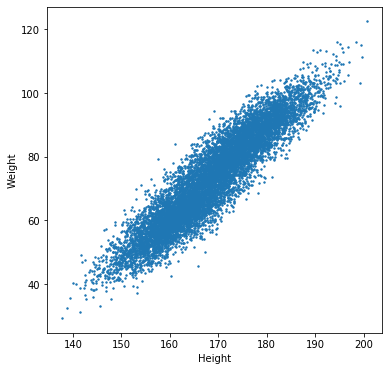

In [31]:
x = df['Height (cm)'].values.reshape(-1, 1)
y = df['Weight (kg)'].values.reshape(-1, 1)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [32]:
def correlation (x,y):
    x1 = (x - np.mean(x))
    y1 = (x - np.mean(y))
    
    num = np.sum(x1*y1)
    div = np.sqrt(np.sum(x1**2) * np.sum(y1**2))
    return num/div

In [34]:
class MyLinearRegression():
    def __init__(self):
        self.b0 = 0.0
        self.b1 = 0.0
    
    def fit(self, x,y):
        self.b1 = correlation(x,y) * np.std(y) / np.std(x)
        self.b0 = np.mean(y) - (self.b1 * np.mean(x))
        
    def predict(self, x):
        return self.b0 + self.b1*x


b0: 47.61373455672028 b1: 0.15194739573556293


Text(0, 0.5, 'Weight')

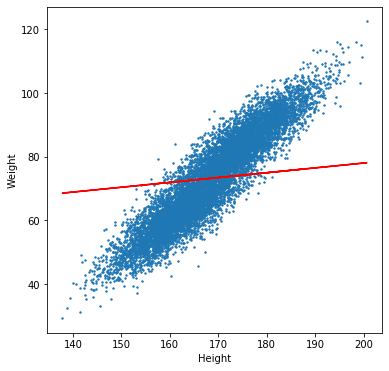

In [35]:
reg = MyLinearRegression()
reg.fit(x, y)

print('b0: {} b1: {}'.format(reg.b0, reg.b1))

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c='red')
plt.xlabel('Height')
plt.ylabel('Weight')

b0: [-159.09158431] b1: [[1.37814958]]


Text(0, 0.5, 'Weight')

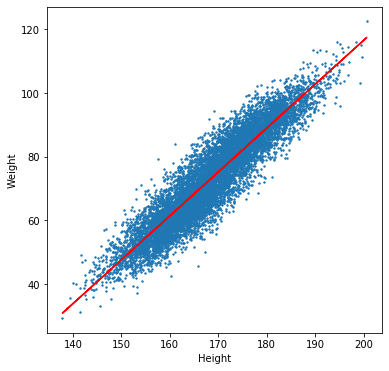

In [36]:
reg = LinearRegression()
reg.fit(x, y)

print('b0: {} b1: {}'.format(reg.intercept_, reg.coef_))

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c='red')
plt.xlabel('Height')
plt.ylabel('Weight')